In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [4]:
data = pd.read_csv("dataset/Data ISPU kota DKI Jakarta 2021-2024.csv")

In [5]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,NaN,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,NaN,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,NaN,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  4620 non-null   int64 
 1   tanggal       4620 non-null   object
 2   lokasi_spku   4620 non-null   object
 3   pm10          4612 non-null   object
 4   pm25          4552 non-null   object
 5   so2           4615 non-null   object
 6   co            4612 non-null   object
 7   o3            4616 non-null   object
 8   no2           4606 non-null   object
 9   max           4617 non-null   object
 10  critical      4567 non-null   object
 11  categori      4619 non-null   object
 12  stasiun       4620 non-null   object
dtypes: int64(1), object(12)
memory usage: 469.3+ KB


In [7]:
data.isna().sum()

periode_data     0
tanggal          0
lokasi_spku      0
pm10             8
pm25            68
so2              5
co               8
o3               4
no2             14
max              3
critical        53
categori         1
stasiun          0
dtype: int64

Remove NA

In [8]:
for i in data:
  data[i] = data[i].fillna('-')

data.replace("---", "-")

data.isna().sum()

periode_data    0
tanggal         0
lokasi_spku     0
pm10            0
pm25            0
so2             0
co              0
o3              0
no2             0
max             0
critical        0
categori        0
stasiun         0
dtype: int64

In [9]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,-,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [10]:
data['critical'] = data['critical'].replace("PM2,5", "PM25")
data['critical'] = data['critical'].replace("1", "-")
data['critical'] = data['critical'].replace("2", "-")
data['critical'] = data['critical'].replace("3", "-")
data['critical'] = data['critical'].replace("5", "-")

In [11]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,-,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [12]:
data.loc[4557, 'max'] = "49"
data.loc[4557, 'critical'] = "PM25"
data.loc[4557, 'categori'] = "BAIK"

data.loc[2730, 'stasiun'] = "-"
data.loc[2730, 'lokasi_spku'] = "-"

In [13]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,-,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [14]:
data['pm10'] = data['pm10'].replace("-", np.nan)
data['pm10'] = data['pm10'].replace("---", np.nan)

data['pm25'] = data['pm25'].replace("-", np.nan)
data['pm25'] = data['pm25'].replace("---", np.nan)

data['so2'] = data['so2'].replace("-", np.nan)
data['so2'] = data['so2'].replace("---", np.nan)

data['co'] = data['co'].replace("-", np.nan)
data['co'] = data['co'].replace("---", np.nan)

data['o3'] = data['o3'].replace("-", np.nan)
data['o3'] = data['o3'].replace("---", np.nan)

data['no2'] = data['no2'].replace("-", np.nan)
data['no2'] = data['no2'].replace("---", np.nan)

data['max'] = data['max'].replace("-", np.nan)
data['max'] = data['max'].replace("---", np.nan)

In [15]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,NaN,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [16]:
data['pm10'] = data['pm10'].fillna('0')
data['so2'] = data['so2'].fillna('0')
data['co'] = data['co'].fillna('0')
data['o3'] = data['o3'].fillna('0')
data['no2'] = data['no2'].fillna('0')
data['pm25'] = data['pm25'].fillna('0')
data['max'] = data['max'].fillna('0')

In [17]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,0,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [18]:
data = data[data['categori'] != 'TIDAK ADA DATA']

In [19]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
0,202401,21/1/2024,DKI3,51,65,45,9,8,79,79,-,SEDANG,Jagakarsa
1,202401,22/1/2024,DKI3,27,34,45,5,8,56,56,-,SEDANG,Jagakarsa
2,202401,23/1/2024,DKI3,0,52,46,6,9,51,52,PM25,SEDANG,Jagakarsa
3,202401,24/1/2024,DKI3,46,65,46,8,9,38,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37,55,47,7,11,28,55,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47,64,38,13,38,35,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61,85,33,23,37,44,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53,70,43,12,32,15,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35,55,42,7,29,9,55,PM25,SEDANG,Jagakarsa


In [20]:
data['pm10'] = data['pm10'].astype(int)
data['so2'] = data['so2'].astype(int)
data['co'] = data['co'].astype(int)
data['o3'] = data['o3'].astype(int)
data['no2'] = data['no2'].astype(int)
data['pm25'] = data['pm25'].astype(int)
data['max'] = data['max'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_18116\569090752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pm10'] = data['pm10'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_18116\569090752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['so2'] = data['so2'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_18116\569090752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4580 entries, 0 to 4619
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  4580 non-null   int64 
 1   tanggal       4580 non-null   object
 2   lokasi_spku   4580 non-null   object
 3   pm10          4580 non-null   int32 
 4   pm25          4580 non-null   int32 
 5   so2           4580 non-null   int32 
 6   co            4580 non-null   int32 
 7   o3            4580 non-null   int32 
 8   no2           4580 non-null   int32 
 9   max           4580 non-null   int32 
 10  critical      4580 non-null   object
 11  categori      4580 non-null   object
 12  stasiun       4580 non-null   object
dtypes: int32(7), int64(1), object(5)
memory usage: 375.7+ KB


In [22]:
data.describe()

,periode_data,pm10,pm25,so2,co,o3,no2,max
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,202228.794105,49.085153,71.086245,36.486026,13.013100,30.936681,20.011354,76.149127
std,109.906020,19.096042,31.025660,14.601918,6.756153,17.611242,11.807525,23.650330
min,202101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,202108.000000,38.000000,56.000000,25.000000,9.000000,19.000000,13.000000,59.000000
50%,202212.000000,53.000000,74.000000,38.000000,12.000000,27.000000,18.000000,75.000000
75%,202308.000000,62.000000,90.000000,50.000000,16.000000,38.000000,26.000000,90.000000
max,202404.000000,179.000000,287.000000,112.000000,70.000000,181.000000,202.000000,287.000000


<Axes: xlabel='pm10'>

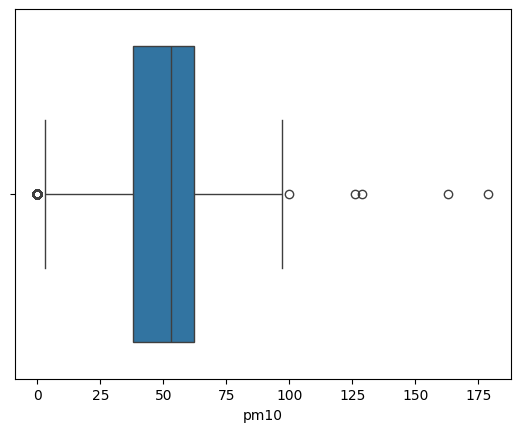

In [23]:
sb.boxplot(data=data, x="pm10")

<Axes: xlabel='pm25'>

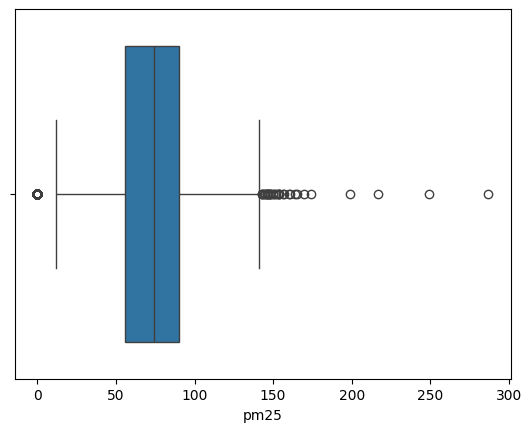

In [24]:
sb.boxplot(data=data, x="pm25")

<Axes: xlabel='so2'>

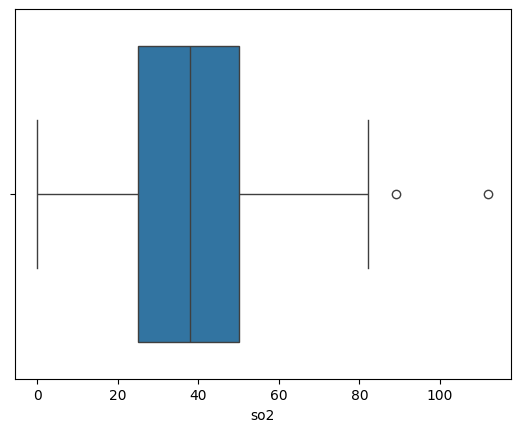

In [25]:
sb.boxplot(data=data, x="so2")

<Axes: xlabel='co'>

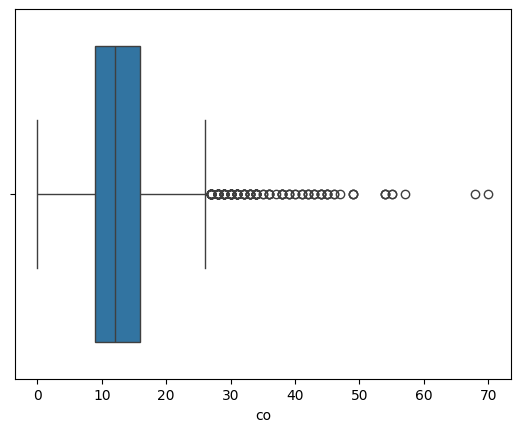

In [26]:
sb.boxplot(data=data, x="co")

<Axes: xlabel='o3'>

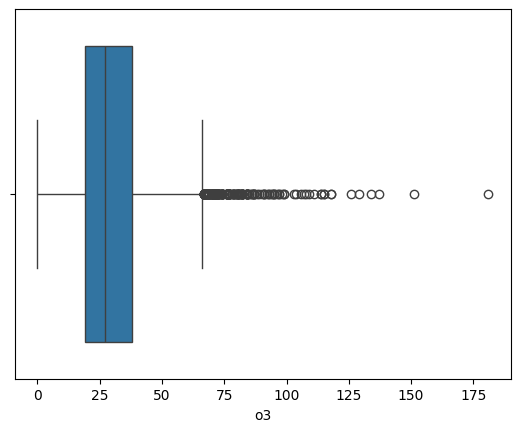

In [27]:
sb.boxplot(data=data, x="o3")

<Axes: xlabel='no2'>

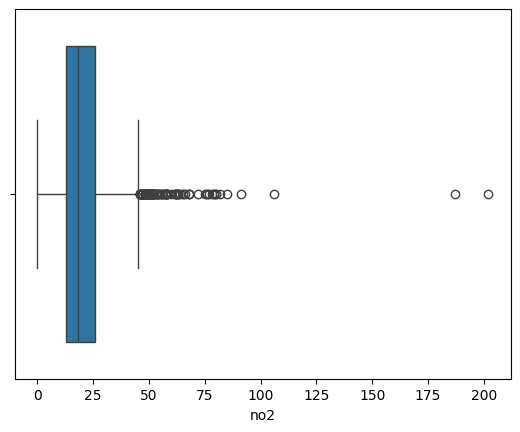

In [28]:
sb.boxplot(data=data, x="no2")

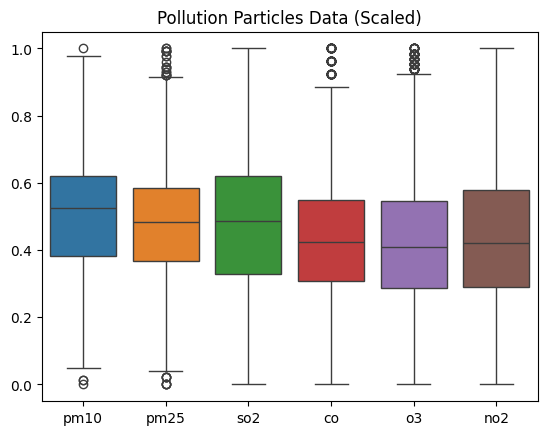

In [48]:
df_visual = data.copy()

df_visual_num = df_visual.select_dtypes(exclude = object)

scaler = MinMaxScaler()
df_visual_scaled = pd.DataFrame(scaler.fit_transform(df_visual_num), columns=df_visual_num.columns)

df_visual_scaled = df_visual_scaled.drop(columns=['periode_data', 'max'])

sb.boxplot(data=df_visual_scaled)
plt.title("Pollution Particles Data (Scaled)")
plt.show()

In [30]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_clean[column_name]

data['pm10'] = remove_outliers_iqr(data, 'pm10')
data['pm25'] = remove_outliers_iqr(data, 'pm25')
data['so2'] = remove_outliers_iqr(data, 'so2')
data['co'] = remove_outliers_iqr(data, 'co')
data['o3'] = remove_outliers_iqr(data, 'o3')
data['no2'] = remove_outliers_iqr(data, 'no2')

C:\Users\user\AppData\Local\Temp\ipykernel_18116\1652879651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pm10'] = remove_outliers_iqr(data, 'pm10')
C:\Users\user\AppData\Local\Temp\ipykernel_18116\1652879651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pm25'] = remove_outliers_iqr(data, 'pm25')
C:\Users\user\AppData\Local\Temp\ipykernel_18116\1652879651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [31]:
data = data.dropna()

In [32]:
data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
3,202401,24/1/2024,DKI3,46.0,65.0,46.0,8.0,9.0,38.0,65,PM25,SEDANG,Jagakarsa
4,202401,25/1/2024,DKI3,37.0,55.0,47.0,7.0,11.0,28.0,55,PM25,SEDANG,Jagakarsa
5,202401,26/1/2024,DKI3,43.0,62.0,50.0,7.0,15.0,14.0,62,PM25,SEDANG,Jagakarsa
6,202401,27/1/2024,DKI3,40.0,52.0,48.0,8.0,12.0,10.0,52,PM25,SEDANG,Jagakarsa
7,202401,28/1/2024,DKI3,40.0,62.0,48.0,12.0,12.0,18.0,62,PM25,SEDANG,Jagakarsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,12/30/2021,DKI2,47.0,64.0,38.0,13.0,38.0,35.0,64,PM25,SEDANG,Kelapa Gading
4616,202112,12/31/2021,DKI2,61.0,85.0,33.0,23.0,37.0,44.0,85,PM25,SEDANG,Kelapa Gading
4617,202112,12/1/2021,DKI3,53.0,70.0,43.0,12.0,32.0,15.0,70,PM25,SEDANG,Jagakarsa
4618,202112,12/2/2021,DKI3,35.0,55.0,42.0,7.0,29.0,9.0,55,PM25,SEDANG,Jagakarsa


In [33]:
# save_data = pd.DataFrame.copy(data)
# save_data.to_csv('preprocessedISPU.csv', index=False)

Feature Selection

In [34]:
tmp_data = pd.DataFrame.copy(data)

In [37]:
data_num = tmp_data.select_dtypes(exclude = object)
data_categorical = tmp_data.select_dtypes(include = object)

encoder = LabelEncoder()

for col in data_categorical:
  tmp_data[col] = encoder.fit_transform(tmp_data[col])

tmp_data

,periode_data,tanggal,lokasi_spku,pm10,pm25,so2,co,o3,no2,max,critical,categori,stasiun
3,202401,459,2,46.0,65.0,46.0,8.0,9.0,38.0,65,3,1,1
4,202401,463,2,37.0,55.0,47.0,7.0,11.0,28.0,55,3,1,1
5,202401,467,2,43.0,62.0,50.0,7.0,15.0,14.0,62,3,1,1
6,202401,471,2,40.0,52.0,48.0,8.0,12.0,10.0,52,3,1,1
7,202401,475,2,40.0,62.0,48.0,12.0,12.0,18.0,62,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,202112,320,1,47.0,64.0,38.0,13.0,38.0,35.0,64,3,1,3
4616,202112,322,1,61.0,85.0,33.0,23.0,37.0,44.0,85,3,1,3
4617,202112,271,2,53.0,70.0,43.0,12.0,32.0,15.0,70,3,1,1
4618,202112,294,2,35.0,55.0,42.0,7.0,29.0,9.0,55,3,1,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3560 entries, 3 to 4619
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   periode_data  3560 non-null   int64  
 1   tanggal       3560 non-null   object 
 2   lokasi_spku   3560 non-null   object 
 3   pm10          3560 non-null   float64
 4   pm25          3560 non-null   float64
 5   so2           3560 non-null   float64
 6   co            3560 non-null   float64
 7   o3            3560 non-null   float64
 8   no2           3560 non-null   float64
 9   max           3560 non-null   int32  
 10  critical      3560 non-null   object 
 11  categori      3560 non-null   object 
 12  stasiun       3560 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 375.5+ KB
